# Notebook for the Bursting gene Chemical Reaction Network

Bursting Gene Chemical Reaction Network:

\begin{equation}
    \emptyset \xrightleftharpoons[\theta_2]{\theta_1} S_1 \quad
    S_1 \xrightarrow{\theta_3} S_1+S_2 \quad
    S_2 \xrightarrow{\theta_4} \emptyset
\end{equation}

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN

from CRN4_bursting_gene import propensities_bursting_gene as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'bursting_gene'
NUM_PARAMS = 4

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')

y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')

X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')

y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')

X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Hyperparameters

In [4]:
LR = 0.005
N_ITER = 700
N_HIDDEN = 128
BATCHSIZE = 32
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [8]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


Training ...: 100%|█████████▉| 699/700 [13:03<00:01,  1.12s/it]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016409313539043069,
 Valid loss: 0.001613059313967824


Training ...: 100%|█████████▉| 699/700 [13:27<00:01,  1.16s/it]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016568467253819108,
 Valid loss: 0.00171275541651994


Training ...: 100%|█████████▉| 699/700 [14:13<00:01,  1.22s/it]

Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016056762542575598,
 Valid loss: 0.001613688189536333


In [9]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'BG_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models_long/BG_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models_long/BG_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models_long/BG_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [13]:
# Compute losses

print("Model")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("Model")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("Model")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model
KLD : 0.0016544885002076626
Hellinger : 0.020052606239914894
Model
KLD : 0.001679093111306429
Hellinger : 0.02016279101371765
Model
KLD : 0.0016201389953494072
Hellinger : 0.019851353019475937


## Probability mass function

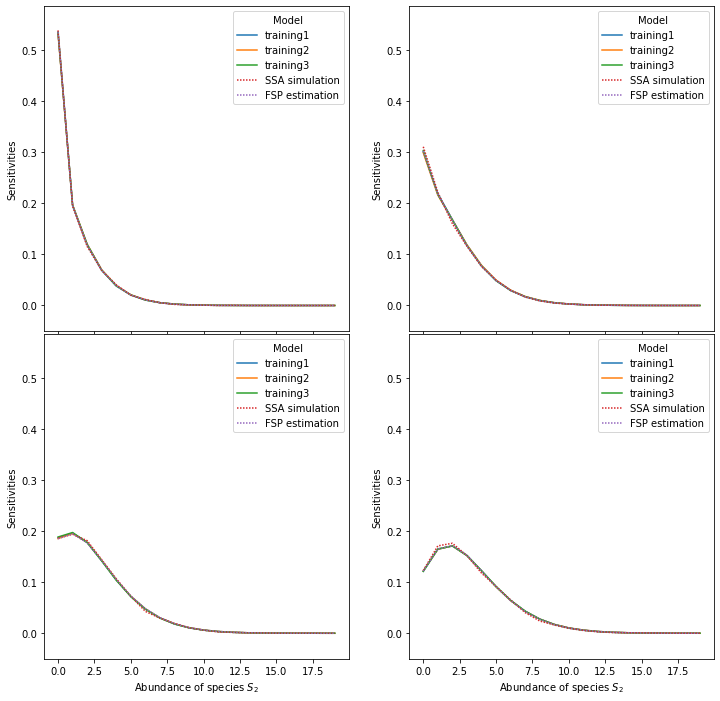

In [9]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = 4*[20], 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot_test_result=(True, [y_test[1_000+k,:] for k in range(4)]), 
                    plot_fsp_result=(True,
                                    propensities.stoich_mat, 
                                    propensities.propensities,
                                    None,
                                    40, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    NUM_PARAMS, 
                                    0),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_SI_fig5.pdf'))

For a time further in the future than the training range:

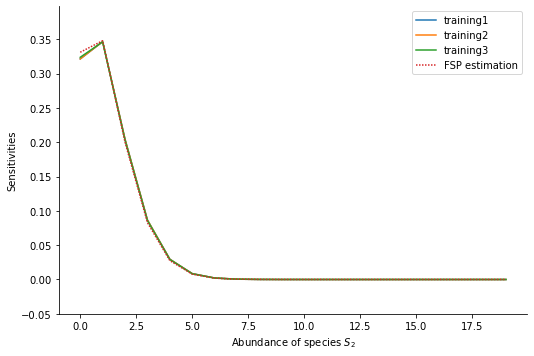

In [10]:
plot.plot_model(to_pred=torch.tensor([30., 0.6409, 2.0359, 0.2688, 0.0368]),
                models=[model1, model2, model3], 
                up_bound=20,
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities,
                                None, 
                                40, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                index_names=('Sensitivities', r'Abundance of species $S_2$'),
                save=(False, 'CRN4_SI_fig6.pdf'))

For parameters outside of the training range:

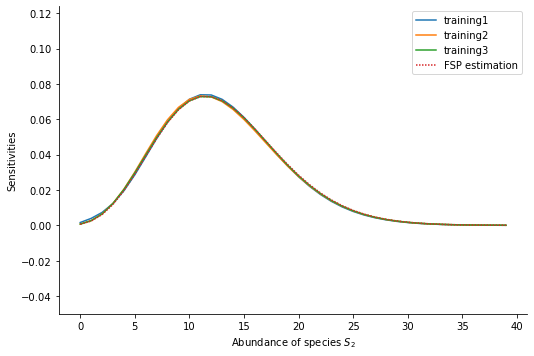

In [11]:
plot.plot_model(to_pred=torch.tensor([10., 1.5, 4.5, 7.5, 0.075]), 
                models=[model1, model2, model3], 
                up_bound=40, 
                time_windows=np.array([20]),
                n_comps=N_COMPS,
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                80, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                index_names=('Sensitivities', r'Abundance of species $S_2$'),
                save=(False, 't10kon5koff15.pdf'))

## Sensitivity of the likelihood

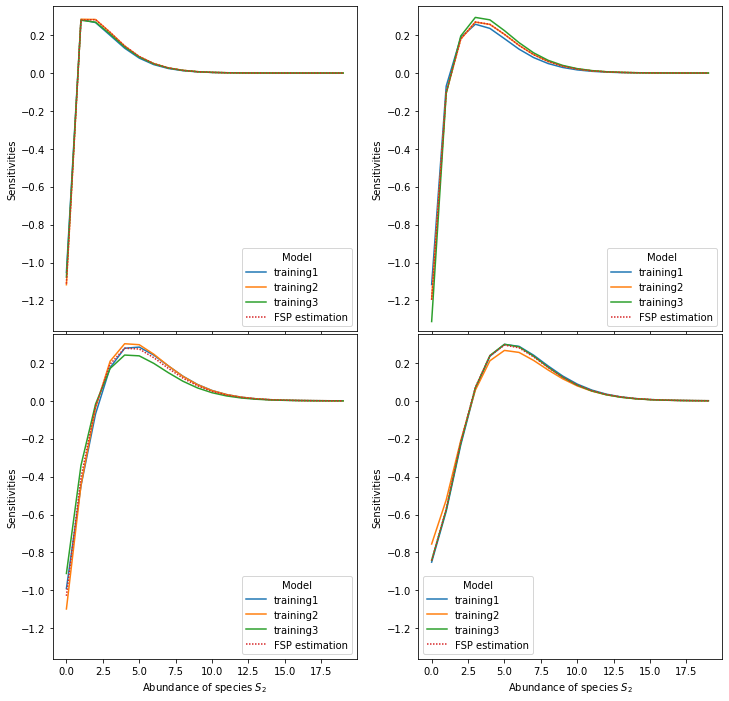

In [13]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[20]*4, 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 0), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities,
                                    None, 
                                    40, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    NUM_PARAMS, 
                                    0),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_SI_fig7.pdf'))

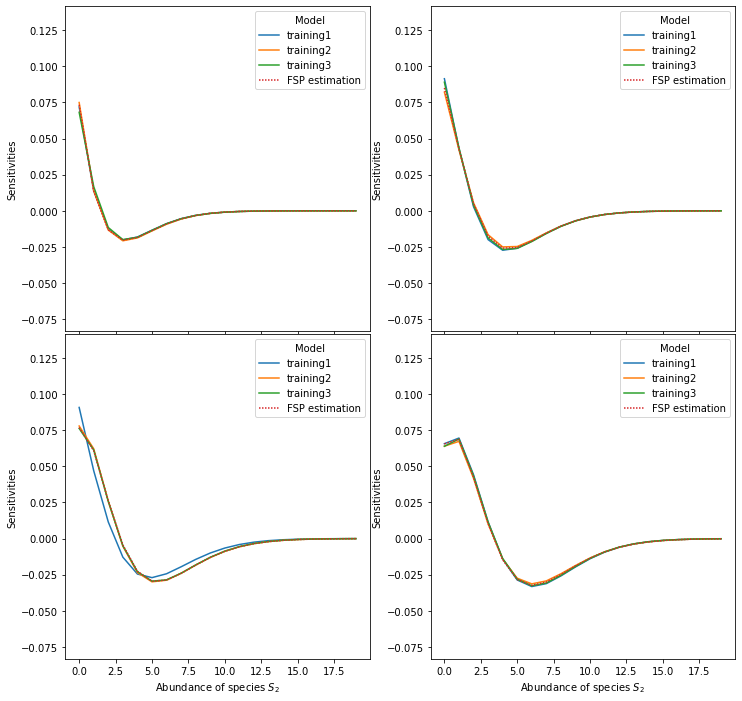

In [14]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[20]*4,
                    time_windows=np.array([20]), 
                    n_comps=N_COMPS,
                    plot=('sensitivities', 1), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities,
                                    None,
                                    40, 
                                    propensities.init_state,
                                    propensities.ind_species,
                                    NUM_PARAMS, 
                                    0),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_fig5.pdf'))

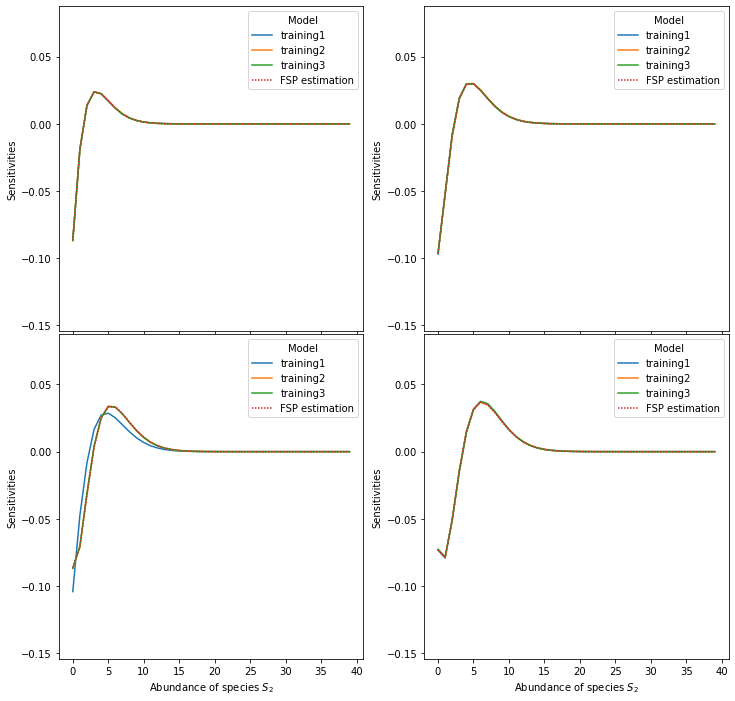

In [15]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[40]*4, 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 2), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities, 
                                    None,
                                    80, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    NUM_PARAMS, 
                                    0),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_SI_fig9.pdf'))

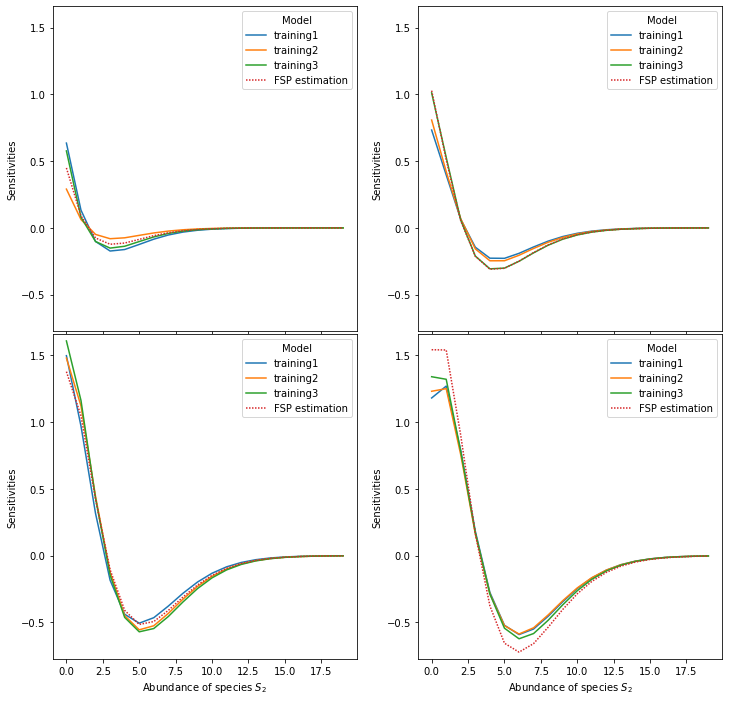

In [17]:
plot.multiple_plots(to_pred=[X_test[1_000+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[20]*4, 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot=('sensitivities', 3), 
                    plot_fsp_result=(True, 
                                    propensities.stoich_mat, 
                                    propensities.propensities,
                                    None, 
                                    40, 
                                    propensities.init_state, 
                                    propensities.ind_species, 
                                    NUM_PARAMS, 
                                    0),
                    index_names=('Sensitivities', r'Abundance of species $S_2$'),
                    save=(False, 'CRN4_SI_fig11.pdf'))

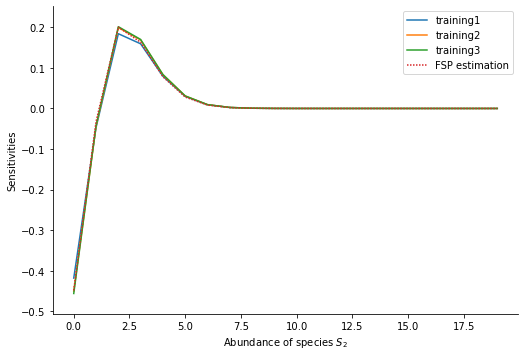

In [18]:
plot.plot_model(to_pred=torch.tensor([30, 0.6409, 2.0359, 0.2688, 0.0368]), 
                models=[model1, model2, model3], 
                up_bound=20, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot=('sensitivities', 0),
                plot_fsp_result=(True, 
                                propensities.stoich_mat,
                                propensities.propensities, 
                                None,
                                40, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                index_names=('Sensitivities', r'Abundance of species $S_2$'),
                save=(False, 'CRN4_SI_fig8.pdf'))

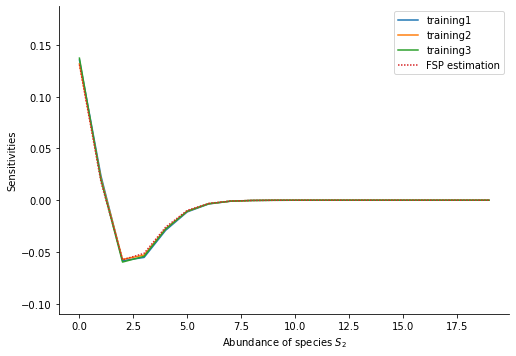

In [19]:
plot.plot_model(to_pred=torch.tensor([30, 0.6409, 2.0359, 0.2688, 0.0368]), 
                models=[model1, model2, model3], 
                up_bound=20,
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot=('sensitivities', 1),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                40, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                index_names=('Sensitivities', r'Abundance of species $S_2$'),
                save=(False, 'CRN4_fig6.pdf'))

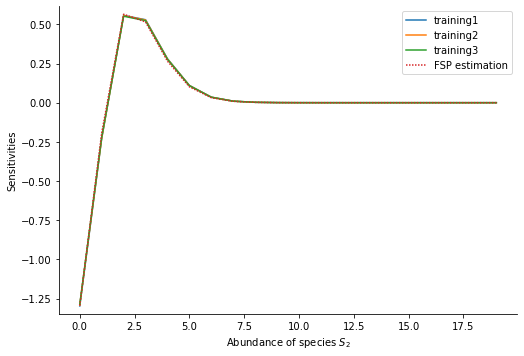

In [20]:
plot.plot_model(to_pred=torch.tensor([30, 0.6409, 2.0359, 0.2688, 0.0368]), 
                models=[model1, model2, model3], 
                up_bound=20, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot=('sensitivities', 2),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                40, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                index_names=('Sensitivities', r'Abundance of species $S_2$'),
                save=(False, 'CRN4_SI_fig10.pdf'))

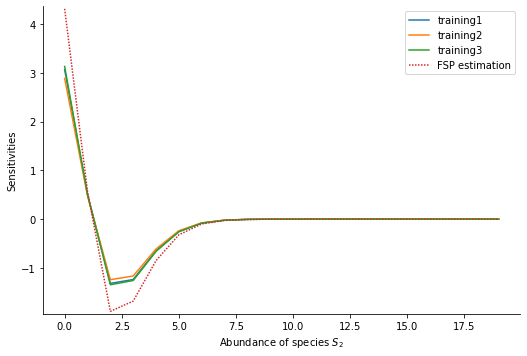

In [21]:
plot.plot_model(to_pred=torch.tensor([30, 0.6409, 2.0359, 0.2688, 0.0368]), 
                models=[model1, model2, model3], 
                up_bound=20, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot=('sensitivities', 3),
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                40, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                index_names=('Sensitivities', r'Abundance of species $S_2$'),
                save=(False, 'CRN4_SI_fig12.pdf'))

## Fisher information

21.68803381919861


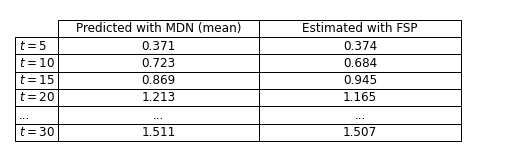

In [22]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=0,
            time_windows=np.array([30]),
            up_bound=200,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            None,
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            NUM_PARAMS, 
                            0),
            out_of_bounds_index=4,
            save=(False, 'CRN4_SI_fig13.pdf'))

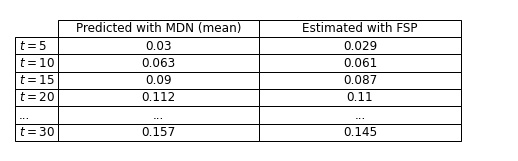

In [16]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=1,
            time_windows=np.array([30]),
            up_bound=200,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities,
                            None, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            NUM_PARAMS, 
                            0),
            out_of_bounds_index=4,
            save=(False, 'CRN4_fig7.pdf'))

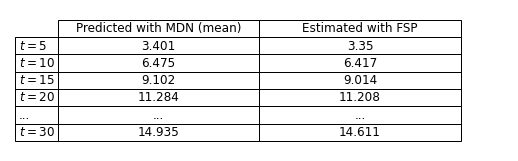

In [16]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=2,
            time_windows=np.array([30]),
            up_bound=200,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            NUM_PARAMS, 
                            0),
            out_of_bounds_index=4,
            save=(False, 'CRN4_fig8.pdf'))

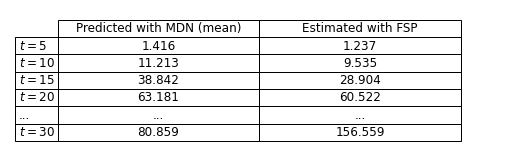

In [18]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=3,
            time_windows=np.array([30]),
            up_bound=200,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities,
                            None, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            NUM_PARAMS, 
                            0),
            out_of_bounds_index=4,
            save=(False, 'CRN4_SI_fig14.pdf'))

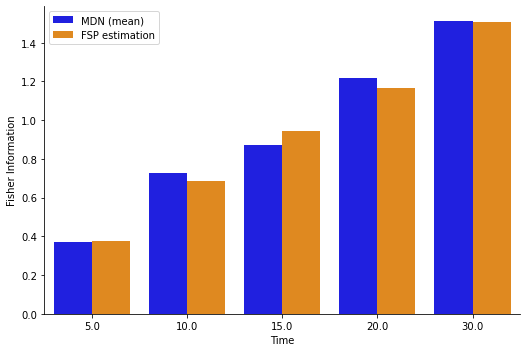

In [21]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
            params=X_test[992, 1:].numpy(), 
            ind_param=0,
            time_windows=np.array([30]),
            up_bound=200,
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_fsp_result=(True, 
                            propensities.stoich_mat, 
                            propensities.propensities,
                            None, 
                            400, 
                            propensities.init_state, 
                            propensities.ind_species, 
                            NUM_PARAMS, 
                            0),
            save=(False, 'CRN4_SI_bars_fig13.pdf'),
            colors=['blue', 'darkorange', 'forestgreen'])

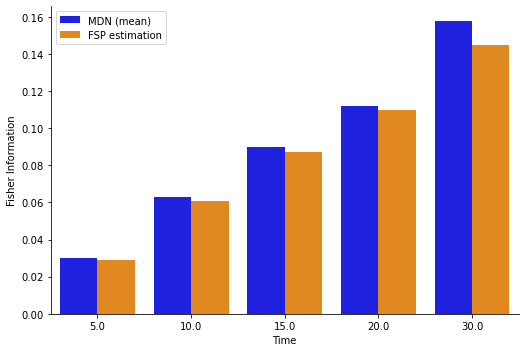

In [22]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
                params=X_test[992, 1:].numpy(), 
                ind_param=1,
                time_windows=np.array([30]),
                up_bound=200,
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                400, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                save=(False, 'CRN4_bars_fig7.pdf'),
                colors=['blue', 'darkorange', 'forestgreen'])

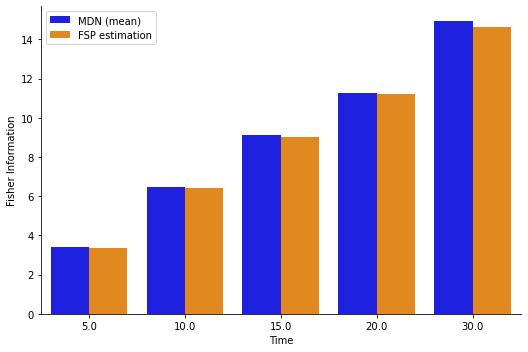

In [23]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
                params=X_test[992, 1:].numpy(), 
                ind_param=2,
                time_windows=np.array([30]),
                up_bound=200,
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                400, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                save=(False, 'CRN4_bars_fig8.pdf'))

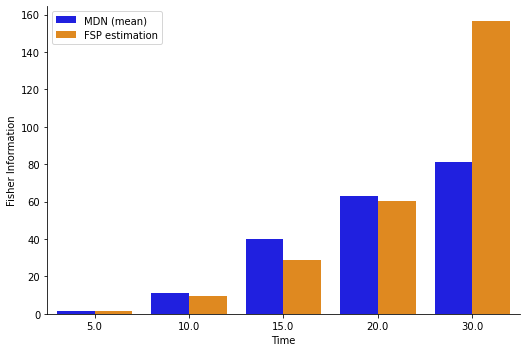

In [24]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]), 
                params=X_test[992, 1:].numpy(), 
                ind_param=3,
                time_windows=np.array([30]),
                up_bound=200,
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_fsp_result=(True, 
                                propensities.stoich_mat, 
                                propensities.propensities, 
                                None,
                                400, 
                                propensities.init_state, 
                                propensities.ind_species, 
                                NUM_PARAMS, 
                                0),
                save=(False, 'CRN4_SI_bars_fig14.pdf'),
                colors=['blue', 'darkorange', 'forestgreen'])